<a href="https://colab.research.google.com/github/gabrielblins/Machine-Learning-Engineer-Bootcamp-IGTI/blob/master/Modulo3/Trabalho_Pratico_Modulo_3_IGTI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Trabalho Prático Módulo 3 - Seleção de Modelos de Aprendizado de Máquina


---

By: Gabriel Barros Lins

In [1]:
import pandas as pd
df_diabetes = pd.read_csv('diabetes_numeric.csv')
df_bloodtransf = pd.read_csv('bloodtransf.csv')
df_wine = pd.read_csv('wine.csv')

In [2]:
df_diabetes.shape

(43, 3)

In [12]:
df_diabetes.head()

,age,deficit,c_peptide
0,5.2,-8.1,4.8
1,8.8,-16.1,4.1
2,10.5,-0.9,5.2
3,10.6,-7.8,5.5
4,10.4,-29.0,5.0


In [3]:
df_bloodtransf.shape

(748, 5)

In [13]:
df_bloodtransf.head()

,V1,V2,V3,V4,Class
0,2,50,12500,98,2
1,0,13,3250,28,2
2,1,16,4000,35,2
3,2,20,5000,45,2
4,1,24,6000,77,1


In [4]:
df_wine.shape

(178, 14)

In [5]:
df_wine.head()

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
df_wine['class'].value_counts()

2    71
1    59
3    48
Name: class, dtype: int64

In [7]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        43 non-null     float64
 1   deficit    43 non-null     float64
 2   c_peptide  43 non-null     float64
dtypes: float64(3)
memory usage: 1.1 KB


In [10]:
df_bloodtransf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   V1      748 non-null    int64
 1   V2      748 non-null    int64
 2   V3      748 non-null    int64
 3   V4      748 non-null    int64
 4   Class   748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [9]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   class                           178 non-null    int64  
 1   Alcohol                         178 non-null    float64
 2   Malic_acid                      178 non-null    float64
 3   Ash                             178 non-null    float64
 4   Alcalinity_of_ash               178 non-null    float64
 5   Magnesium                       178 non-null    int64  
 6   Total_phenols                   178 non-null    float64
 7   Flavanoids                      178 non-null    float64
 8   Nonflavanoid_phenols            178 non-null    float64
 9   Proanthocyanins                 178 non-null    float64
 10  Color_intensity                 178 non-null    float64
 11  Hue                             178 non-null    float64
 12  OD280%2FOD315_of_diluted_wines  178 

In [16]:
df_wine.columns

Index(['class', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash',
       'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue',
       'OD280%2FOD315_of_diluted_wines', 'Proline'],
      dtype='object')

In [17]:
feat_diab = ['age', 'deficit']
feat_blood = ['V1', 'V2', 'V3', 'V4']
feat_wine = ['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 
             'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 
             'Proanthocyanins', 'Color_intensity', 'Hue', 
             'OD280%2FOD315_of_diluted_wines', 'Proline']

In [26]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train_diab, X_test_diab, y_train_diab, y_test_diab = train_test_split(df_diabetes[feat_diab],df_diabetes['c_peptide'], test_size = 0.35, random_state = 54)
X_train_blood, X_test_blood, y_train_blood, y_test_blood = train_test_split(df_bloodtransf[feat_blood], df_bloodtransf['Class'], test_size = 0.35, random_state = 54)
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(df_wine[feat_wine], df_wine['class'], test_size = 0.35, random_state = 54)

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

linmodel = LinearRegression()
linmodel.fit(X_train_diab,y_train_diab)
predict_diab = linmodel.predict(X_test_diab)

print('R2:', r2_score(y_test_diab, predict_diab))
print('MAE:', mean_absolute_error(y_test_diab,predict_diab))
print('MSE:', mean_squared_error(y_test_diab,predict_diab))

R2: 0.2730761502482787
MAE: 0.5469803958260979
MSE: 0.40159703152494497


In [30]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score

svcmodel = SVC(kernel='rbf')
svcmodel.fit(X_train_blood,y_train_blood)
predict_blood = svcmodel.predict(X_test_blood)

print(classification_report(y_test_blood,predict_blood, digits = 5))
print('AUROC',roc_auc_score(y_test_blood, predict_blood))

              precision    recall  f1-score   support

           1    0.75954   1.00000   0.86334       199
           2    0.00000   0.00000   0.00000        63

    accuracy                        0.75954       262
   macro avg    0.37977   0.50000   0.43167       262
weighted avg    0.57690   0.75954   0.65574       262

AUROC 0.5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


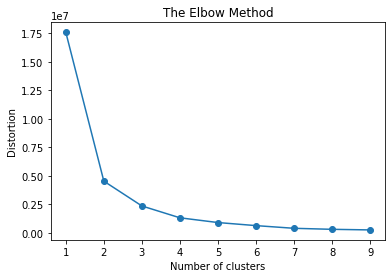

In [36]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, mutual_info_score

distorcoes= []
K = range(1,10)
for k in K:
    kmeanmodel = KMeans(n_clusters=k)
    kmeanmodel.fit(df_wine[feat_wine])
    distorcoes.append(kmeanmodel.inertia_)

plt.plot(K, distorcoes, 'o-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method')
plt.show()

In [35]:
kmeanmodel = KMeans(n_clusters=3)
kmeanmodel.fit(X_train_wine,y_train_wine)
predict_wine = kmeanmodel.predict(X_test_wine)

print('Silhouette Score:', silhouette_score(X_test_wine, predict_wine)) 
print('Davies-Bouldin Score:', davies_bouldin_score(X_test_wine, predict_wine))
print('Mutual Info Score:', mutual_info_score(y_test_wine, predict_wine))

Silhouette Score: 0.5581747258825838
Davies-Bouldin Score: 0.5316199338449925
Mutual Info Score: 0.42739927199674965
